In [49]:
print("hello")

hello


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [51]:
carData_filepath = "C:/Users/PORTATIL/OneDrive/Documentos/Projects/CochecitosScrapping/OutputData/coches_data_consolidado_2025-02-19_17-27.parquet"

# Load dataset
df = pd.read_parquet(carData_filepath)

# Drop rows with missing values in relevant columns
df = df.dropna()

In [52]:
# Split features into separate columns
df["FeaturesList"] = df["Features"].str.split(", ")
features_df = df["FeaturesList"].apply(pd.Series)

#concatenate back the desired features
df = pd.concat([df, features_df.iloc[:, [0, 1]]], axis=1)
df = df.rename(columns={1: "KM", 0: "YEAR"})


In [53]:
# Clean and convert YEAR column
df["YEAR"] = (
    df["YEAR"]
    .astype(str)  # Ensure it's a string
    .str.strip()  # Remove leading/trailing spaces
    .replace("", np.nan)  # Convert empty strings to NaN
    .dropna()  # Remove NaN values
    .astype(int)  # Convert to integer
)

# Convert price to integer (removing non-digit characters)
df["PriceInt"] = (
    df["Price"].astype(str)
    .str.replace(r"[^\d]", "", regex=True)  # Keep only digits
    .replace("", np.nan)  # Replace empty strings with NaN
    .dropna()  # Drop NaN rows
    .astype(float)  # Convert to float
)

# Clean and convert KM column
df["KM"] = df["KM"].str.replace(r"[^\d]", "", regex=True).astype(float) # Convert to float
df = df.dropna()

df = df.sort_values("KM")


In [54]:
# Define independent variables and target variable
X = df[["KM", "YEAR"]]
y = df["PriceInt"]

# Train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [55]:
df['Predicted_Price'] = model.predict(X)

In [56]:
df['Predicted_Price'] = model.predict(X)

# Create a grid for the regression plane
km_range = np.linspace(df["KM"].min(), df["KM"].max(), 20)
year_range = np.linspace(df["YEAR"].min(), df["YEAR"].max(), 20)
KM_grid, Year_grid = np.meshgrid(km_range, year_range)

# Compute predicted prices for the grid using the linear regression model
Z = model.intercept_ + model.coef_[0] * KM_grid + model.coef_[1] * Year_grid

print(Z.shape)


(20, 20)


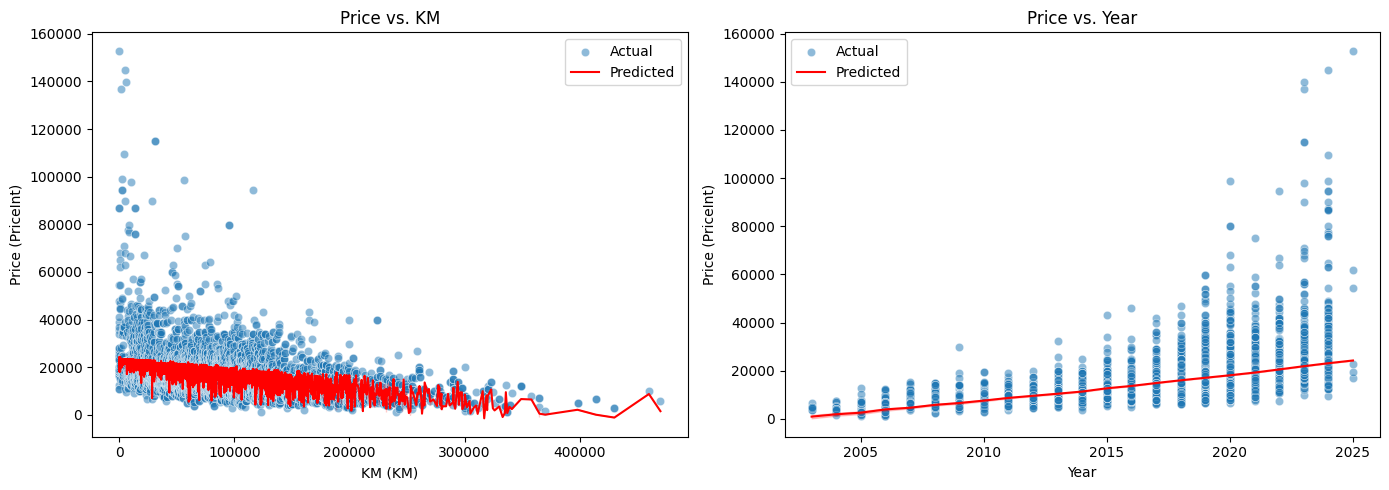

In [57]:
# Create scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=df['KM'], y=df['PriceInt'], alpha=0.5, label='Actual', ax=axes[0])
sns.lineplot(x=df['KM'], y=df['Predicted_Price'], color='red', label='Predicted', ax=axes[0])
axes[0].set_title('Price vs. KM')
axes[0].set_xlabel('KM (KM)')
axes[0].set_ylabel('Price (PriceInt)')

sns.scatterplot(x=df['YEAR'], y=df['PriceInt'], alpha=0.5, label='Actual', ax=axes[1])
sns.lineplot(x=df['YEAR'], y=df['Predicted_Price'], color='red', label='Predicted', ax=axes[1])
axes[1].set_title('Price vs. Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price (PriceInt)')

plt.tight_layout()
plt.show()  # ✅ Ensures the first plot is displayed before moving to the next


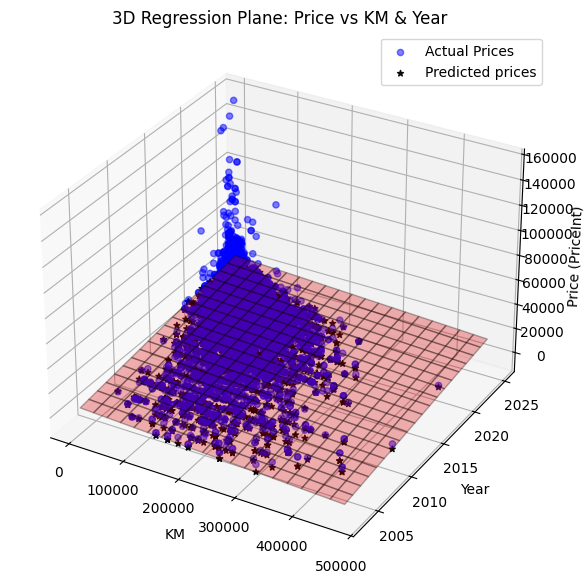

In [58]:
# Create a grid for the regression plane
km_range = np.linspace(df["KM"].min(), df["KM"].max(), 20)
year_range = np.linspace(df["YEAR"].min(), df["YEAR"].max(), 20)
KM_grid, Year_grid = np.meshgrid(km_range, year_range)

# Compute predicted prices for the grid using the linear regression model
Z = model.intercept_ + model.coef_[0] * KM_grid + model.coef_[1] * Year_grid

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(df["KM"], df["YEAR"], df["PriceInt"], c='blue', marker='o', alpha=0.5, label="Actual Prices")
ax.scatter(df["KM"], df["YEAR"], df["Predicted_Price"], c='black', marker='*', alpha=0.9, label="Predicted prices")


# Plot the regression plane
ax.plot_surface(KM_grid, Year_grid, Z, color='red', alpha=0.3, edgecolor='k')

# Labels and title
ax.set_xlabel('KM')
ax.set_ylabel('Year')
ax.set_zlabel('Price (PriceInt)')
ax.set_title('3D Regression Plane: Price vs KM & Year')

# Show the plot
plt.legend()
plt.show()


In [59]:
# Define independent variables and target variable
df['YEAR2'] = df[["YEAR"]] * df[['YEAR']]
X = df[["YEAR2", "YEAR"]]
y = df["PriceInt"]

# Train the regression model
modelSquared = LinearRegression()
modelSquared.fit(X, y)

print(modelSquared.coef_)

[ 5.81076670e+01 -2.33180774e+05]


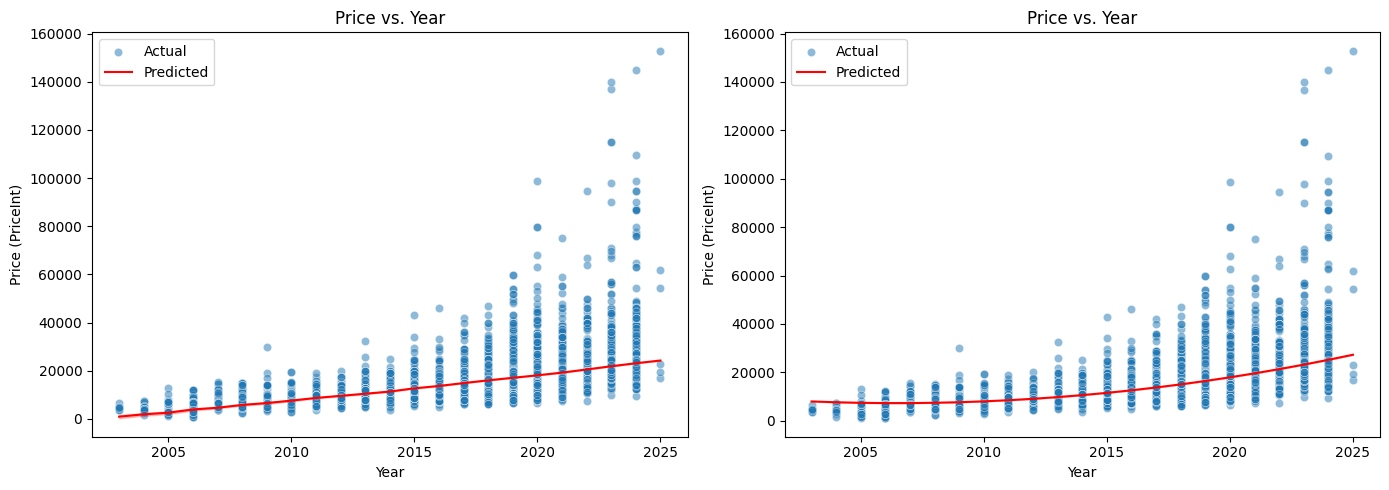

In [60]:
df['Predicted_Price_squared'] = modelSquared.predict(X)

# Create scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.scatterplot(x=df['YEAR'], y=df['PriceInt'], alpha=0.5, label='Actual', ax=axes[1])
sns.lineplot(x=df['YEAR'], y=df['Predicted_Price_squared'], color='red', label='Predicted', ax=axes[1])
axes[0].set_title('Price vs. Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price (PriceInt)')

sns.scatterplot(x=df['YEAR'], y=df['PriceInt'], alpha=0.5, label='Actual', ax=axes[0])
sns.lineplot(x=df['YEAR'], y=df['Predicted_Price'], color='red', label='Predicted', ax=axes[0])
axes[1].set_title('Price vs. Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price (PriceInt)')

plt.tight_layout()
plt.show()  # ✅ Ensures the first plot is displayed before moving to the next
